In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
df = pd.read_csv("/Car details v3.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [2]:
df.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Original Data Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])
X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print("Preprocessing complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

First 5 rows:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000  

In [9]:
print("Initial shape:", df.shape)
print(df.info())
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)
print("Missing values:\n", df.isnull().sum())
df = df.dropna()
print("After dropping missing values:", df.shape)
if df['year'].dtype != 'int64':
    df['year'] = df['year'].astype(int)
df.columns = df.columns.str.lower().str.replace(' ', '_')
q_low = df['selling_price'].quantile(0.01)
q_hi  = df['selling_price'].quantile(0.99)
df = df[(df['selling_price'] >= q_low) & (df['selling_price'] <= q_hi)]
print("After removing outliers (1st–99th percentile):", df.shape)
print("\nCleaned DataFrame preview:")
print(df.head())


Initial shape: (8128, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None
After removing duplicates: (6926, 13)
Missing values:
 name               0
year               0
selling_price      0
km_driven          0

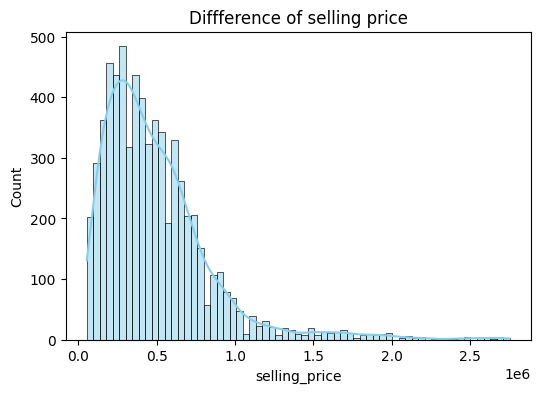

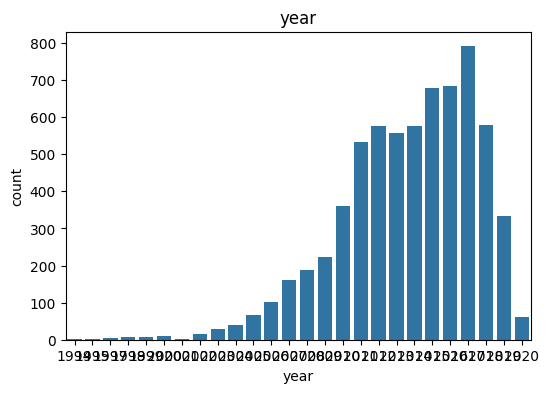

In [15]:
#univariate
plt.figure(figsize=(6, 4))
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title("Diffference of selling price")
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='year', data=df)
plt.title("year")
plt.show()


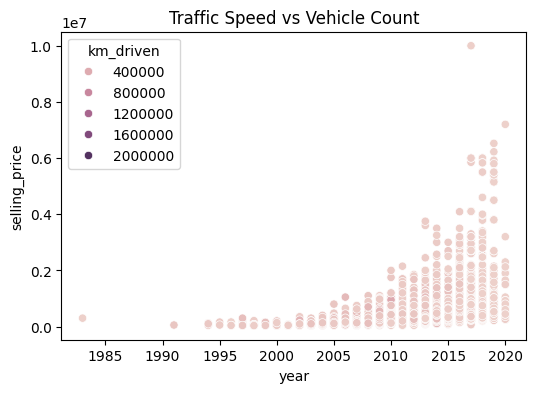

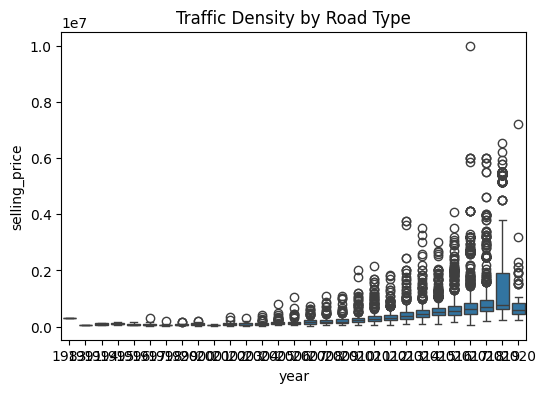

In [27]:
#bivariate
plt.figure(figsize=(6, 4))
sns.scatterplot(x='year', y='selling_price', hue='km_driven', data=df)
plt.title("Traffic Speed vs Vehicle Count")
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title("Traffic Density by Road Type")
plt.show()

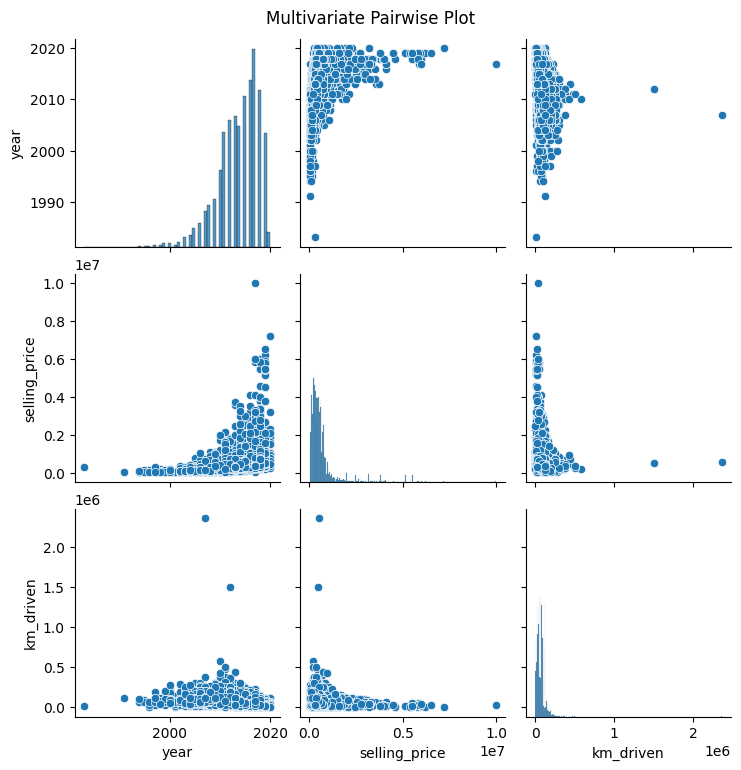

In [28]:
#multivariate
sns.pairplot(df[['year', 'selling_price', 'km_driven']])
plt.suptitle("Multivariate Pairwise Plot", y=1.02)
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=['number'])
print("\n📈 Covariance Matrix:")
print(numeric_df.cov())


📈 Covariance Matrix:
                        year  selling_price     km_driven         seats
year               13.982806   6.890738e+05 -8.848085e+04     -0.031612
selling_price  689073.835534   1.230812e+11 -3.419084e+09  81858.202773
km_driven      -88480.847587  -3.419084e+09  3.474418e+09  12111.374218
seats              -0.031612   8.185820e+04  1.211137e+04      0.961637


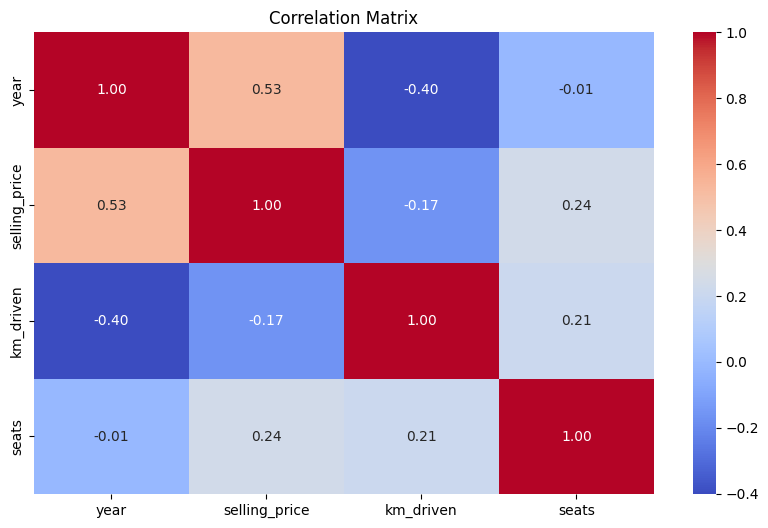

In [22]:
# CORRELATION & COVARIANCE

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

✅ Linear Regression Equation: y = -0.02x + 79916.28


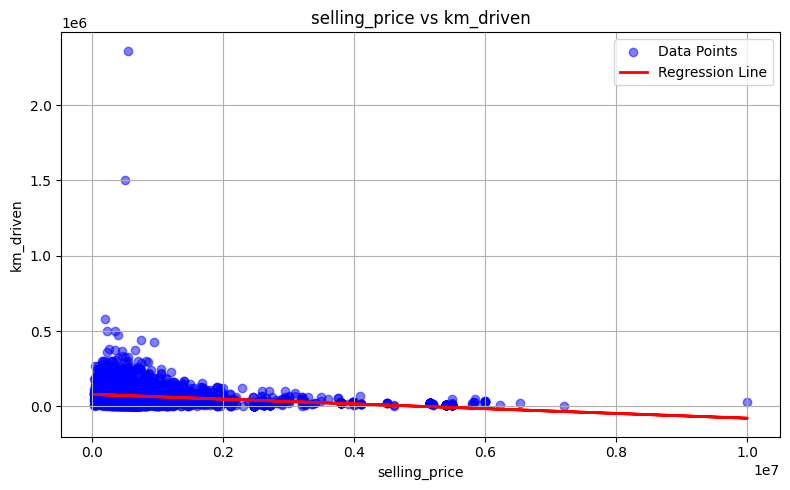

In [29]:
df = df[['selling_price', 'km_driven']].dropna()
X = df['selling_price'].values.reshape(-1, 1)
y = df['km_driven'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0][0]
b = model.intercept_[0]

print(f"✅ Linear Regression Equation: y = {m:.2f}x + {b:.2f}")
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('selling_price vs km_driven')
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
features = ['selling_price', 'km_driven']
target = 'year'

df = df[features + [target]].dropna()

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")

✅ R² Score: 0.3165
📉 MSE: 10.68
📉 RMSE: 3.27


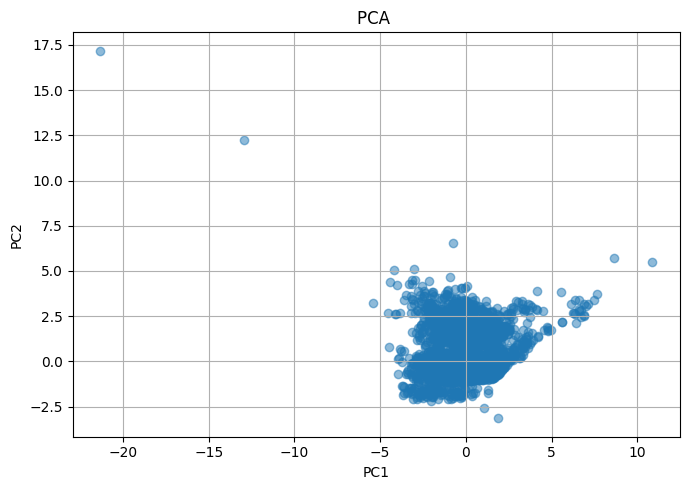

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Car details v3.csv")
df = df.drop_duplicates().dropna()
df.columns = df.columns.str.lower().str.replace(' ', '_')
X = df.select_dtypes(include=['int64', 'float64'])
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


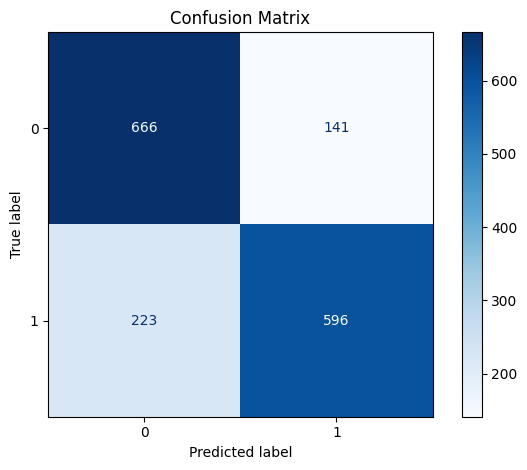

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = df.drop_duplicates().dropna()

features = ['selling_price', 'km_driven']
target = 'year'
df = df[features + [target]].dropna()

X = df[features]
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
print("✅ Ridge Regression:")
print(f"🔹 MSE: {mean_squared_error(y_test, ridge_pred):,.2f}")
print(f"🔹 R² Score: {r2_score(y_test, ridge_pred):.4f}\n")

print("✅ Lasso Regression:")
print(f"🔹 MSE: {mean_squared_error(y_test, lasso_pred):,.2f}")
print(f"🔹 R² Score: {r2_score(y_test, lasso_pred):.4f}")


✅ Ridge Regression:
🔹 MSE: 10.55
🔹 R² Score: 0.2719

✅ Lasso Regression:
🔹 MSE: 11.97
🔹 R² Score: 0.1736


📊 XGBoost Results:
✅ MSE: 4.52
✅ R² Score: 0.6881


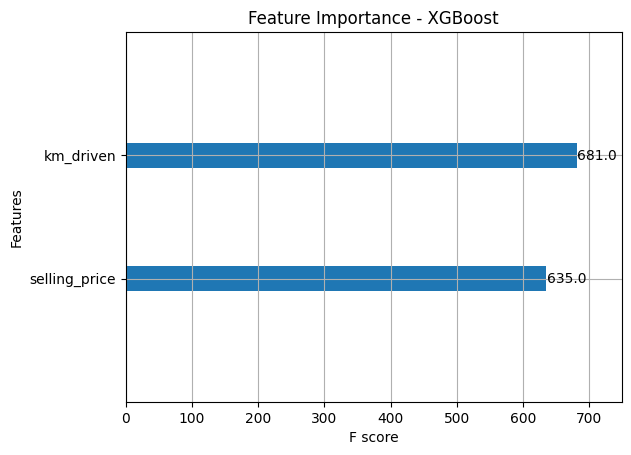

In [63]:
import xgboost as xgb
features = ['selling_price', 'km_driven']
target = 'year'
df = df[features + [target]].dropna()

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 XGBoost Results:")
print(f"✅ MSE: {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")
xgb.plot_importance(model)
plt.title("Feature Importance - XGBoost")
plt.show()


y = -0.2255x + 0.0000


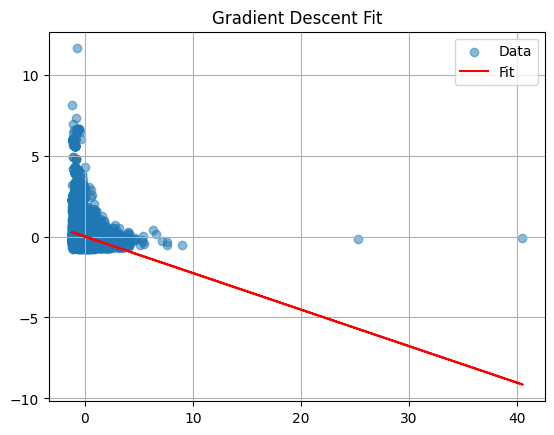

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Car details v3.csv')[['selling_price', 'km_driven']].dropna()
X = df['km_driven'].values
y = df['selling_price'].values
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
m, b = 0, 0
lr = 0.01
for _ in range(1000):
    y_pred = m * X + b
    error = y - y_pred
    m -= lr * (-2 * (X * error).mean())
    b -= lr * (-2 * error.mean())

print(f"y = {m:.4f}x + {b:.4f}")

plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, m*X + b, color='red', label='Fit')
plt.title("Gradient Descent Fit")
plt.legend()
plt.grid(True)
plt.show()


In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/Car details v3.csv')
df = df[['selling_price', 'km_driven', 'year']].dropna()

X = df[['km_driven', 'year']]
y = df['selling_price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print(f"🔹 Average R² Score: {scores.mean():.4f}")


Cross-Validation R² Scores: [0.16599062 0.17625213 0.17522591 0.16039516 0.17537407]
🔹 Average R² Score: 0.1706


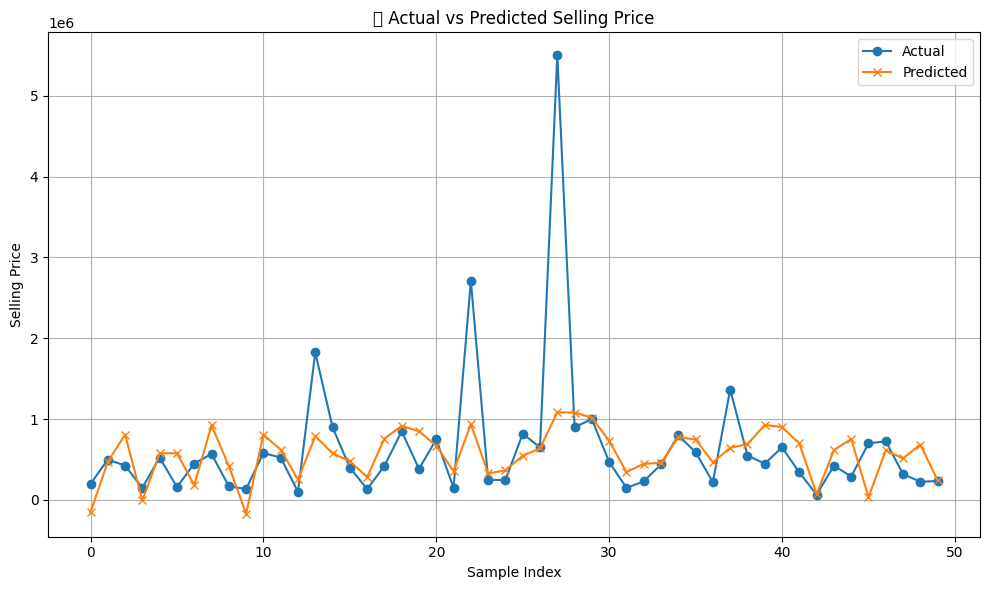

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title("🔍 Actual vs Predicted Selling Price")
plt.xlabel("Sample Index")
plt.ylabel("Selling Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()